# NLP

## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
data = pd.read_csv('./web_scrapping+NLP/data_com2.csv', index_col=False, delimiter = ',')
data.head()

,note,commentaire
0,4.0,une bonne suite pour les aventures de sonic au...
1,5.0,Cette suite de sonic est incroyable !Le fan qu...
2,4.5,Très bon film ont retrouve ce qui fait l'espri...
3,4.0,"Super film de ouf, le fait que Knuckles soit d..."
4,3.0,Malgré deux nouveaux personnages de l'univers ...


In [4]:
data.isna().sum()

note           0
commentaire    2
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isna().sum()

note           0
commentaire    0
dtype: int64

In [6]:
data.loc[(data.note>3),'sentiment']=1
data.loc[(data.note<=3),'sentiment']=0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8034 entries, 0 to 8035
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   note         8034 non-null   float64
 1   commentaire  8034 non-null   object 
 2   sentiment    8034 non-null   float64
dtypes: float64(2), object(1)
memory usage: 251.1+ KB


Text(0.5, 1.0, 'répartition par sentiment')

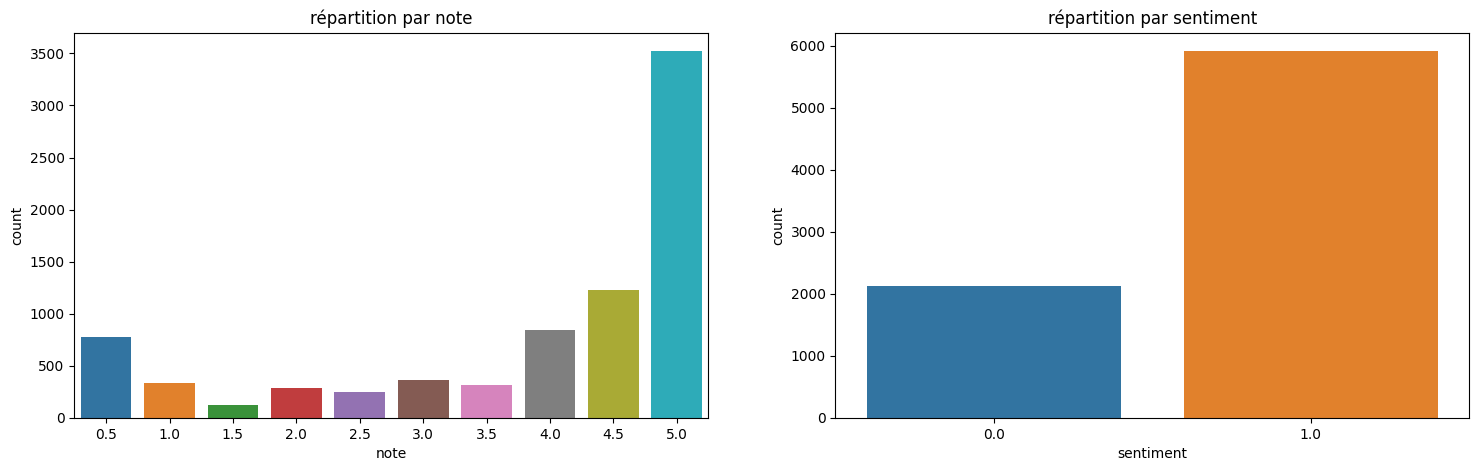

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.countplot(x = data.note, data=data, ax=ax[0])
ax[0].set_title("répartition par note")
sns.countplot(x = data.sentiment, data=data, ax=ax[1])
ax[1].set_title("répartition par sentiment")

In [54]:
pd.crosstab(data.note, data.sentiment, margins=True).style.background_gradient(cmap='summer_r')

sentiment,0.000000,1.000000,All
note,,,
0.500000,780,0,780
1.000000,331,0,331
1.500000,121,0,121
2.000000,287,0,287
2.500000,244,0,244
3.000000,358,0,358
3.500000,0,317,317
4.000000,0,842,842
4.500000,0,1231,1231


## ML

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = data.sentiment
X = data.commentaire

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(6427,) (1607,)


In [10]:
print(y_train.value_counts())

1.0    4708
0.0    1719
Name: sentiment, dtype: int64


### Data augmentation - backtranslation

googletrans et google_trans_new refusent de fonctionner indiquant nonetype systématiquement, y compris lorsque la phrase est écrite directement dedans.

In [9]:
from deep_translator import GoogleTranslator

In [134]:
def back_translate(sequence):    
    #translate to new language and back to original
    translated = GoogleTranslator(target = 'nl').translate(sequence)
    #translate back to original language
    translated_back = GoogleTranslator(target = 'fr').translate(translated)
    
    if translated_back != sequence:
        return translated_back
    elif translated_back == sequence:
        translated_bis = GoogleTranslator(target = 'ja').translate(sequence)
        #translate back to original language
        translated_back_bis = GoogleTranslator(target = 'fr').translate(translated)
        return translated_back_bis

In [135]:

for commentaire in X_train[y_train == 0]:
    longueur = len(commentaire)
    if longueur < 4800 and commentaire!='?????????????????????????!!!!!!!!!!!!!!!!!!!!!!!!!!!!' and commentaire!='***********************************************************':
        output_translate = back_translate(commentaire)
        X_train = pd.concat([X_train,pd.Series(output_translate, dtype=np.str_)])
        y_train = pd.concat([y_train,pd.Series(0, dtype = np.float64)])
    print(y_train.value_counts())

1.0    4708
0.0    1720
dtype: int64
1.0    4708
0.0    1721
dtype: int64
1.0    4708
0.0    1722
dtype: int64
1.0    4708
0.0    1723
dtype: int64
1.0    4708
0.0    1724
dtype: int64
1.0    4708
0.0    1725
dtype: int64
1.0    4708
0.0    1726
dtype: int64
1.0    4708
0.0    1727
dtype: int64
1.0    4708
0.0    1728
dtype: int64
1.0    4708
0.0    1729
dtype: int64
1.0    4708
0.0    1730
dtype: int64
1.0    4708
0.0    1731
dtype: int64
1.0    4708
0.0    1732
dtype: int64
1.0    4708
0.0    1733
dtype: int64
1.0    4708
0.0    1734
dtype: int64
1.0    4708
0.0    1735
dtype: int64
1.0    4708
0.0    1736
dtype: int64
1.0    4708
0.0    1737
dtype: int64
1.0    4708
0.0    1738
dtype: int64
1.0    4708
0.0    1739
dtype: int64
1.0    4708
0.0    1740
dtype: int64
1.0    4708
0.0    1741
dtype: int64
1.0    4708
0.0    1742
dtype: int64
1.0    4708
0.0    1743
dtype: int64
1.0    4708
0.0    1744
dtype: int64
1.0    4708
0.0    1745
dtype: int64
1.0    4708
0.0    1746
dtype: int64
1

In [136]:
print(X_train.size, y_train.size)

8140 8140


In [137]:
print(y_train.value_counts())

1.0    4708
0.0    3432
dtype: int64


In [138]:
# import joblib
# model_complet={ "Xtrain_translate_synonym":X_train,
#                 "ytrain_translate_synonym":y_train,
#                 }

# joblib.dump(model_complet, 'X_train_trad_synonym2.joblib')
# X_train = joblib.load('X_train_trad_synonym2.joblib')['Xtrain_translate_synonym']
# y_train = joblib.load('X_train_trad_synonym2.joblib')['ytrain_translate_synonym']

In [139]:
print(y_train.value_counts())

1.0    4708
0.0    3432
dtype: int64


### Data augmentation - EDA synonym

In [10]:
import nlpaug.augmenter.word as naw

In [142]:
def synonym_aug(sequence):    
    #translate to new language and back to original
    aug = naw.SynonymAug(aug_src='wordnet')
    translated = GoogleTranslator(target = 'en').translate(sequence)
    #translate back to original language
    augmented_text = aug.augment(translated)
    translated_back = GoogleTranslator(target = 'fr').translate(augmented_text[0])    
    return translated_back
    

In [141]:
y_train.value_counts()[1] - y_train.value_counts()[0]

1276

In [143]:
count = 1
limit = y_train.value_counts()[1] - y_train.value_counts()[0]
for commentaire in X_train[y_train == 0]:
    longueur = len(commentaire)
    if longueur < 1000 and commentaire!='?????????????????????????!!!!!!!!!!!!!!!!!!!!!!!!!!!!' and commentaire!='***********************************************************':
        output_translate = synonym_aug(commentaire)
        X_train = pd.concat([X_train,pd.Series(output_translate, dtype=np.str_)])
        y_train = pd.concat([y_train,pd.Series(0, dtype = np.float64)])        
    if count == limit:
        break
    count += 1
    print(y_train.value_counts())

1.0    4708
0.0    3433
dtype: int64
1.0    4708
0.0    3434
dtype: int64
1.0    4708
0.0    3435
dtype: int64
1.0    4708
0.0    3436
dtype: int64
1.0    4708
0.0    3437
dtype: int64
1.0    4708
0.0    3438
dtype: int64
1.0    4708
0.0    3439
dtype: int64
1.0    4708
0.0    3440
dtype: int64
1.0    4708
0.0    3441
dtype: int64
1.0    4708
0.0    3442
dtype: int64
1.0    4708
0.0    3443
dtype: int64
1.0    4708
0.0    3444
dtype: int64
1.0    4708
0.0    3445
dtype: int64
1.0    4708
0.0    3446
dtype: int64
1.0    4708
0.0    3447
dtype: int64
1.0    4708
0.0    3448
dtype: int64
1.0    4708
0.0    3449
dtype: int64
1.0    4708
0.0    3450
dtype: int64
1.0    4708
0.0    3451
dtype: int64
1.0    4708
0.0    3452
dtype: int64
1.0    4708
0.0    3453
dtype: int64
1.0    4708
0.0    3454
dtype: int64
1.0    4708
0.0    3455
dtype: int64
1.0    4708
0.0    3456
dtype: int64
1.0    4708
0.0    3457
dtype: int64
1.0    4708
0.0    3458
dtype: int64
1.0    4708
0.0    3459
dtype: int64
1

In [144]:
print(y_train.value_counts())

1.0    4708
0.0    4556
dtype: int64


### Exportation du train set

In [11]:
import joblib
# model_complet={ "Xtrain_translate_synonym":X_train,
#                 "ytrain_translate_synonym":y_train,
#                 }

# joblib.dump(model_complet, 'X_train_trad_synonym2.joblib')
X_train = joblib.load('./web_scrapping+NLP/X_train_trad_synonym2.joblib')['Xtrain_translate_synonym']
y_train = joblib.load('./web_scrapping+NLP/X_train_trad_synonym2.joblib')['ytrain_translate_synonym']

In [12]:
print(y_train.value_counts())

1.0    4708
0.0    4556
dtype: int64


### Standardisation

In [13]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def standardize_text(donnees):
    donnees = donnees.str.replace(r"http\S+", "",regex=True)
    donnees = donnees.str.replace(r"http", "",regex=True)
    donnees = donnees.str.replace(r"@\S+", "",regex=True)
    donnees = donnees.str.replace(r"[0-9(),;!:?@<>.=\'\`\"\-\_\n]+", " ",regex=True)
    donnees = donnees.str.replace(r"@", "at",regex=True)
    donnees = donnees.str.lower()
    return donnees

In [15]:
X_train_standard = standardize_text(X_train)
X_test_standard = standardize_text(X_test)

### Lemmatisation + stopwords

In [16]:
liste_stopwords = ['nolan', 'christopher', 'dicaprio', 'leonardo', 'marion', 'cotillard', 'ellen', 'page', 'cillian', 'murphy', 'tom', 'hardy', 'joseph', 'gordon levitt', 'inception',
'sonic', 'knuckles', 'idris', 'elba', 'robotnik', 'jim', 'carrey']

In [17]:
def lemmatizer_stopwords(data):
    lemmatizer = FrenchLefffLemmatizer()
    corpus = []
    for i in range(0, len(data)):
        message = data.iloc[i]
        message = message.split()
        message =[word for word in message if not word in set(stopwords.words('french')+liste_stopwords)]
        message = [lemmatizer.lemmatize(word, 'n') for word in message]
        message = [lemmatizer.lemmatize(word, 'v') for word in message]
        message = ' '.join(message)
        corpus.append(message)
    return corpus

In [18]:
X_train_lem = lemmatizer_stopwords(X_train_standard)
X_test_lem = lemmatizer_stopwords(X_test_standard)

In [19]:
X_train_lem

['film rester bon effet spécial rare qualité acteur faire beaucoup réfléchir trop réfléchir tel poindre pouvoir imaginer fin film',
 'oulalalala voiler faire bien plaisir si tordre ca contrairement avoir tout avoir dire dire aussi tordre memento ah ca non bon celer enlever rien petit bijou cinématographique plaisir',
 'film sans queue ni tête rien comprendre cette histoire beau imager effet spécial service scénario abscons inaccessible',
 'film pompeux prévisible ennuyeux dialoguer platitude affligeant tandem di caprio plaire nunuche mourir baston gentillet bref traitement global totalement superficiel annoncer tuerie mélanger entrer matrix blade runner attendre beaucoup avoir quand signer memento finalement gros déception alors oui effet spécial bien faire bien filmer musiquer beau empêcher trouver ça inintéressant prendre peiner regarder entier si cinéma',
 'tout simplement magnifique vivre memento the dark knight maintenir vivement prochain',
 'après prologue saga film vrai film dém

### Wordcloud

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

(-0.5, 399.5, 199.5, -0.5)

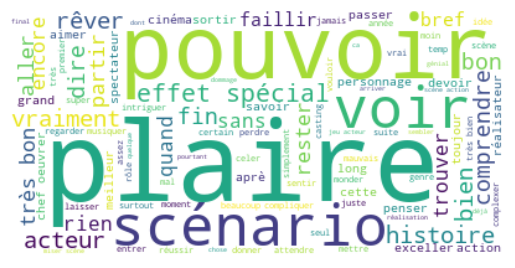

In [21]:
text = " ".join(com for com in X_train_lem)

stopwords_wc = ["di", "caprio", "alors", "si", "film", "tout", "avoir", "prendre", "faire", "là", "ça", "peu", "car" ,"donc", "comme", 'où', 
                'être', 'aussi', 'trop', 'autre', 'apres', 'non', 'matrix', 'etait', 'enfin']

wordcloud = WordCloud(stopwords=set(stopwords_wc), max_words=100, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [22]:
mots_neg, mots_pos, liste_mots_communs=[],[],[]
for i in X_train[y_train == 0]:
    neg = i.split()
    mots_neg+=neg
for i in X_train[y_train == 1]:
    pos = i.split()
    mots_pos+=pos

liste_mots_communs = list(set(mots_neg) & (set(mots_pos)))

In [23]:
stopwords_mc = stopwords_wc + liste_mots_communs

(-0.5, 511.5, 511.5, -0.5)

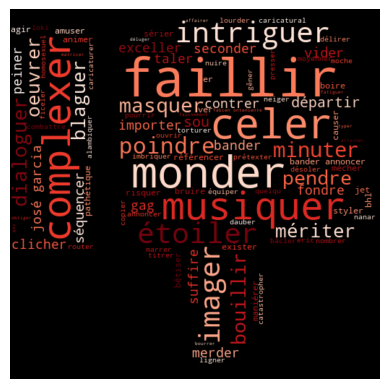

In [26]:
text_neg = " ".join(com for com in lemmatizer_stopwords(standardize_text(X_train[y_train == 0])))

wordcloud_neg = WordCloud(stopwords=set(stopwords_mc), max_words=100, colormap='Reds', mask=np.array(Image.open("./web_scrapping+NLP/dislike.png"))).generate(text_neg)
wordcloud_neg.to_file("pouce_rouge_wc.png")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

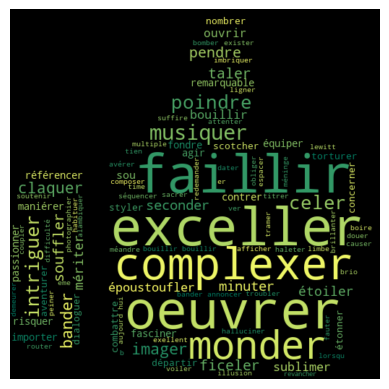

In [28]:
text_pos = " ".join(com for com in lemmatizer_stopwords(standardize_text(X_train[y_train == 1])))

wordcloud_pos = WordCloud(stopwords=set(stopwords_mc), max_words=100, colormap='summer', mask=np.array(Image.open("./web_scrapping+NLP/like.png"))).generate(text_pos)
wordcloud_pos.to_file("pouce_vert_wc.png")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")

In [29]:
import random

In [30]:
mots_neg_list = []
for mot in mots_neg:
    if mot in mots_pos:
        pass
    else:
        mots_neg_list.append(mot)

In [31]:
mots_neg_list += ['daube', 'chier', 'nanar', 'pourri', 'nul', 'navet', 'décevant', 'médiocre', 'débile', 'banal', 'juvénile', 'idiot', 'stupide', 'cliché', 'fade', 'chiant', 'pitoyable']
'navet' in mots_neg_list

True

In [26]:
# mots_pos_list = []
# for mot in mots_pos:
#     if mot in mots_neg:
#         pass
#     else:
#         mots_pos_list.append(mot)

In [32]:
while y_train.value_counts()[0] < y_train.value_counts()[1]:
    new_com = ' '.join(random.choices(mots_neg_list, k = 200))
    X_train_lem.append(new_com)
    y_train = pd.concat([y_train,pd.Series(0, dtype = np.float64)])

In [42]:
# while  y_train.value_counts()[1] < 5000:
#     new_com = ' '.join(random.choices(mots_pos_list, k = 1000))
#     X_train_lem.append(new_com)
#     y_train = pd.concat([y_train,pd.Series(1, dtype = np.float64)])

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train_lem)
X_test_vec = vectorizer.transform(X_test_lem)

In [35]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()

### LGBMClassifier

In [36]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
classifier = lgb.LGBMClassifier()

param_grid= {'boosting_type': ['bgdt', 'dart', 'goss']}
grid = GridSearchCV(classifier, param_grid, cv = cv)
grid.fit(X_train_vec, y_train)

c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\environnement\.venv\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "c:\environnement\.venv\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "c:\enviro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['bgdt', 'dart', 'goss']})

In [38]:
grid.best_estimator_

LGBMClassifier(boosting_type='goss')

In [39]:
grid.best_params_
classifier = grid.best_estimator_
classifier.score(X_test_vec, y_test)

0.8730553827006845

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       402
         1.0       0.92      0.91      0.91      1205

    accuracy                           0.87      1607
   macro avg       0.83      0.84      0.83      1607
weighted avg       0.87      0.87      0.87      1607

Accuracy of LightGBM Model: 87.30553827006845 %


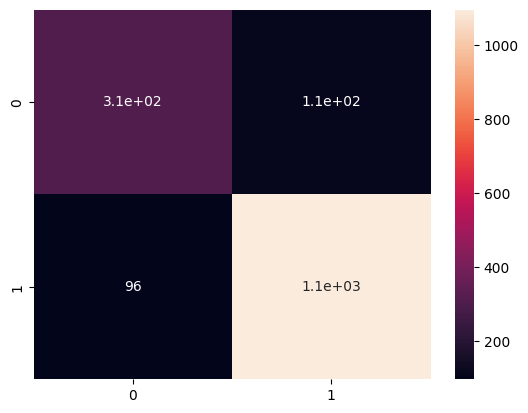

In [40]:
y_pred = classifier.predict(X_test_vec)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
regressor = LogisticRegression()

In [43]:
param_grid= {'multi_class':['ovr'],
'random_state': [0],
'penalty': ['l1', 'l2'],
'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
grid = GridSearchCV(regressor, param_grid, cv = cv)
grid.fit(X_train_vec, y_train)

c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed o

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr'], 'penalty': ['l1', 'l2'],
                         'random_state': [0],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [44]:
grid.best_estimator_

LogisticRegression(multi_class='ovr', random_state=0)

In [45]:
grid.best_params_
regressor = grid.best_estimator_
regressor.score(X_test_vec, y_test)

0.8979464841319228

L'accuaracy score est de : 89.79464841319228


<AxesSubplot: >

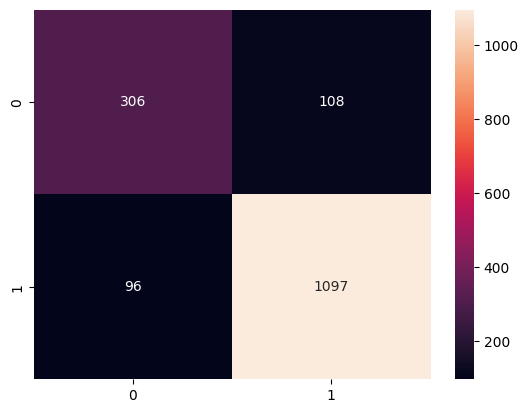

In [46]:
y_pred_reg = regressor.predict(X_test_vec)

acc_reg = accuracy_score(y_pred_reg, y_test)
print("L'accuaracy score est de :", acc_reg * 100)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')

In [47]:
import joblib
# model_complet2={ "X_train":X_train,
#                 "y_train":y_train,
#                 "model_regressor": regressor,
#                 "model_classifier": classifier,
#                 "vectorizer": vectorizer
#                 }

# joblib.dump(model_complet2, 'model_v1.joblib')
vectorizer = joblib.load('model_v1.joblib')['vectorizer']
regressor = joblib.load('model_v1.joblib')['model_regressor']
classifier = joblib.load('model_v1.joblib')['model_classifier']

## Essai

In [48]:
def standardize_phrase(donnees):
        donnees = donnees.replace(r"http\S+", "")
        donnees = donnees.replace(r"http", "")
        donnees = donnees.replace(r"@\S+", "")
        donnees = donnees.replace(r"[0-9(),;!:?@<>.=\'\`\"\-\_\n]", " ")
        donnees = donnees.replace(r"@", "at")
        donnees = donnees.lower()
        
        lemmatizer = FrenchLefffLemmatizer()
        corpus = []
        message = donnees.split()
        message =[word for word in message if word not in stopwords.words('french')]
        message = [lemmatizer.lemmatize(word, 'n') for word in message]
        message = [lemmatizer.lemmatize(word, 'v') for word in message]
        message = ' '.join(message)
        corpus.append(message)
        
        return corpus 


In [49]:
def test_com_classifier(com):
    com_standard = standardize_phrase(com)
    com_vector = vectorizer.transform(com_standard)
    print('Bien !' if classifier.predict(com_vector)[0] == 1 else 'pas bien !', "Réponse de Classifier")   
    print(classifier.predict_proba(com_vector))
    

In [50]:
def test_com_regressor(com):
    com_standard = standardize_phrase(com)
    com_vector = vectorizer.transform(com_standard)
    print('Bien !' if regressor.predict(com_vector)[0] == 1 else 'pas bien !', "Réponse de Regressor")   
    print(regressor.predict_proba(com_vector))

In [53]:
test = 'pas bien'
test_com_classifier(test)
test_com_regressor(test)

Bien ! Réponse de Classifier
[[0.25628212 0.74371788]]
pas bien ! Réponse de Regressor
[[0.61673709 0.38326291]]


- 13/01/23 11:30 - Sans data augmentation ou équilibrage des deux classes et TfidfVectorizer + LGBMClassifier(utiliser dans le tuto), le résultat est de 87% !
- 13/01/23 13:40 - Même paramètre qu'au dessus, mais avec suppression des mots en commun entre les com + et -. Le model chutte à 80% ! à avoir si je garde ou non !
- 13/01/23 14:00 - Toujours sans data augmentation et sans équilibrage + model logisticRegression + mot en commun => 80%
- 13/01/23 14:20 - idem que précédemment, mais sans mot en commun => 84%
- 13/01/23 22:00 - data augmentation par back translation (qq prob pour le mettre en place et qui n'a pas finit, encore une erreur au bout de 45 min, début traduction allemand) => LGBMClassifier = 87% et logisticRegression = 89%
- 14/01/23 11:00 - data augmentation par back translation (après une 1h40, toujours pas finit, je stoppe avant, 4700 + pour 4200 -) => LGBMClassifier = 87% et logisticRegression = 89% (même résultat qu'hier !)
- 14/01/23 14:20 - data augmentation par back translation + synonym => LGBMClassifier = 87% et logisticRegression = 90% (arrondi à 0.1)
- 14/01/23 17:40 - data augmentation par back translation + synonym + création nouvelle phrase à partir des mots présents dans les com + et - => LGBMClassifier = 87.04% et logisticRegression = 90.09% 
- 15/01/23 07:40 - ajout de commentaire neg + étapes précédente => LGBMClassifier = 87.5% et logisticRegression = 89.3% 
- 15/01/22 08:10 - recherche des meilleurs hyper-paramètres => LGBMClassifier = 86.99% et logisticRegression = 89.3% 

In [84]:
'''from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

X_train_token = [simple_preprocess(line, deacc=True) for line in X_train_lem] 
word2vec = Word2Vec(X_train_token, min_count=1, window=1)
X_train_w2v = []
for sentence in X_train_token:
    X_train_w2v.append(np.mean([word2vec.wv[word] for word in sentence], axis=0))'''

c:\environnement\.venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\environnement\.venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
